<a href="https://colab.research.google.com/github/napol-boonthong-660510539/Statistical-Learning-Labs/blob/main/Copy_of_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

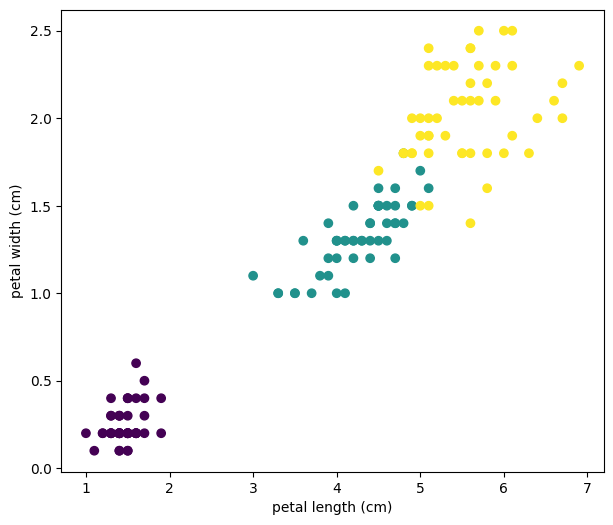

In [ ]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Training Linear SVM with C=0.01


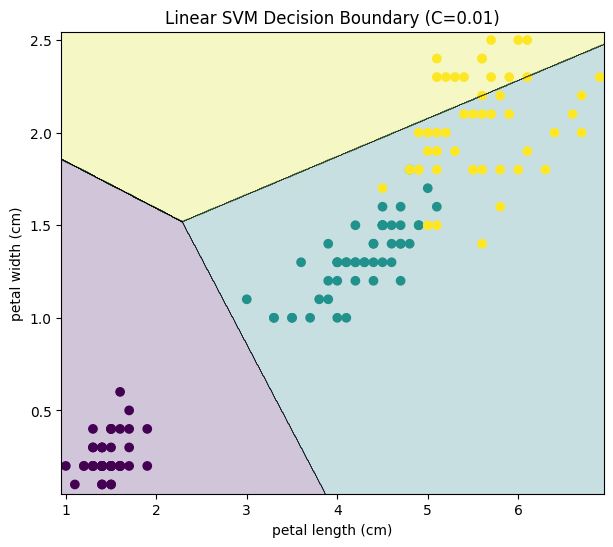

Training Linear SVM with C=0.1


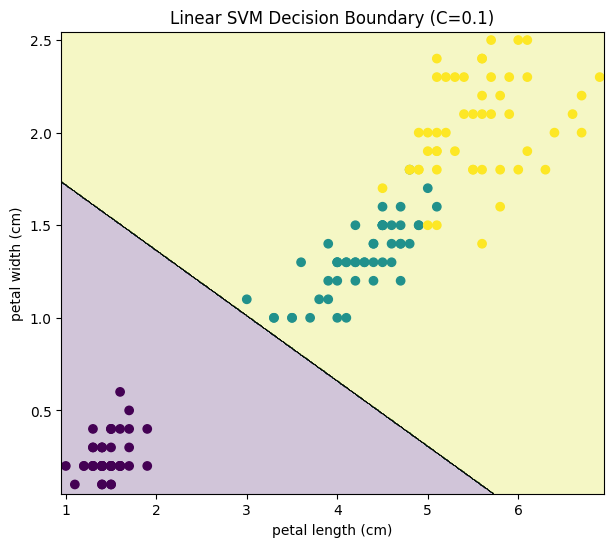

Training Linear SVM with C=1.0


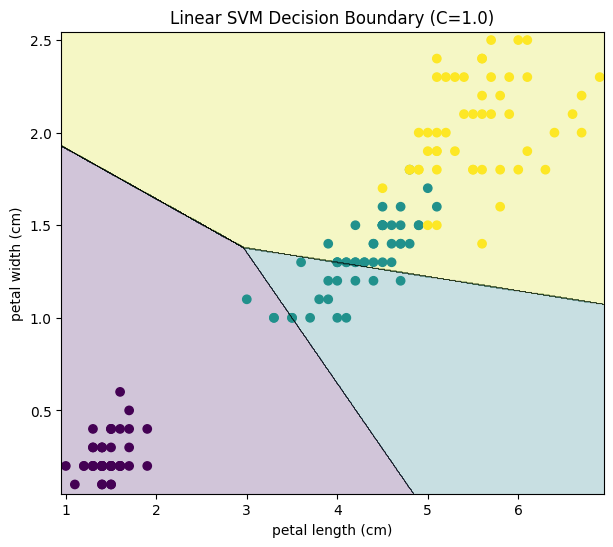

Training Linear SVM with C=10.0


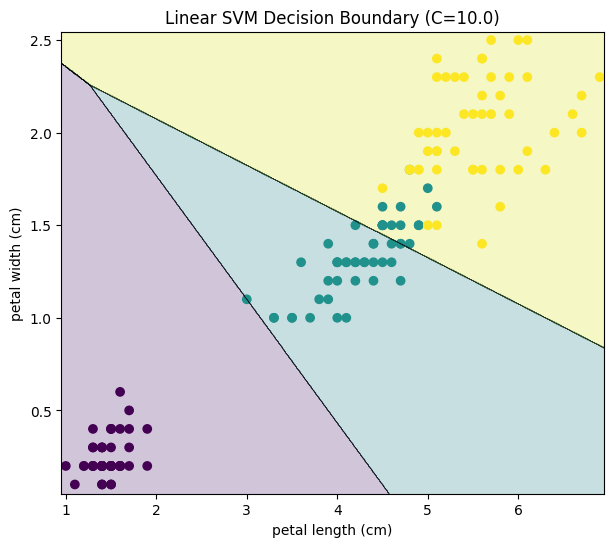

Training Linear SVM with C=100.0


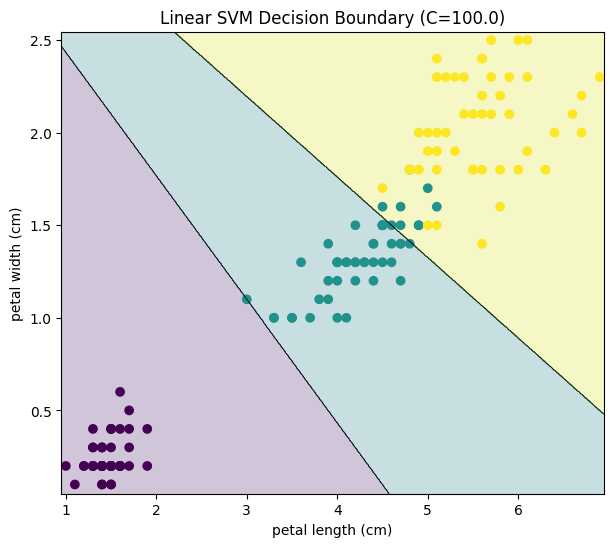

In [ ]:
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    print(f"Training Linear SVM with C={C}")
    # Instantiate LinearSVC with specified loss, max_iter, and C value
    # Set random_state for reproducibility
    linear_svm = LinearSVC(loss='hinge', max_iter=100000, C=C, random_state=42)

    # Fit the model to the training data
    linear_svm.fit(X_train, y_train)

    # Plot the decision boundary
    plot_decision_boundary(linear_svm, X, y)
    plt.title(f'Linear SVM Decision Boundary (C={C})')
    plt.show()

Summary:
Q&A
The C parameter in Linear Support Vector Machines (SVMs) controls the trade-off between achieving a wide decision margin and minimizing misclassification errors on the training data.

Smaller C values (e.g., 0.01, 0.1) result in a smoother decision boundary and a wider margin, indicating a higher tolerance for misclassification. This approach prioritizes generalization, leading to a higher bias and lower variance model.
Larger C values (e.g., 10.0, 100.0) lead to a more rigid decision boundary and a narrower margin, as the model attempts to classify almost all training points correctly, showing a lower tolerance for misclassification. This can result in a lower bias but higher variance, potentially leading to overfitting if C is excessively large.
Data Analysis Key Findings
Linear SVM models were successfully trained and their decision boundaries plotted for five different C values: 0.01, 0.1, 1.0, 10.0, and 100.0.
As C increased from 0.01 to 100.0, the decision boundary transitioned from smoother with a wider margin to more rigid with a narrower margin.
Specifically, C values of 0.01 and 0.1 resulted in decision boundaries that appeared smoother and exhibited wider margins, implying a greater tolerance for misclassification.
Conversely, C values of 10.0 and 100.0 produced decision boundaries that were more rigid and had significantly narrower margins, indicating a lower tolerance for misclassification and an attempt to correctly classify nearly all training data points.
Insights or Next Steps
The C parameter acts as a critical regularization parameter, balancing model complexity (fitting training data) and model simplicity (generalizing to unseen data).
Careful selection of the C value through techniques like cross-validation is essential to optimize the SVM model's performance and prevent issues such as underfitting (too small C) or overfitting (too large C).

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [ ]:
selected_C = 1.0

# Train LinearSVC with the selected C value
linear_svm_selected = LinearSVC(loss='hinge', max_iter=100000, C=selected_C, random_state=42)
linear_svm_selected.fit(X_train, y_train)

# Calculate the accuracy on the test set
test_accuracy = linear_svm_selected.score(X_test, y_test)
test_error = 1 - test_accuracy

print(f"Selected C value: {selected_C}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")

Selected C value: 1.0
Test Accuracy: 0.8333
Test Error: 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training Kernel SVM with gamma=0.01


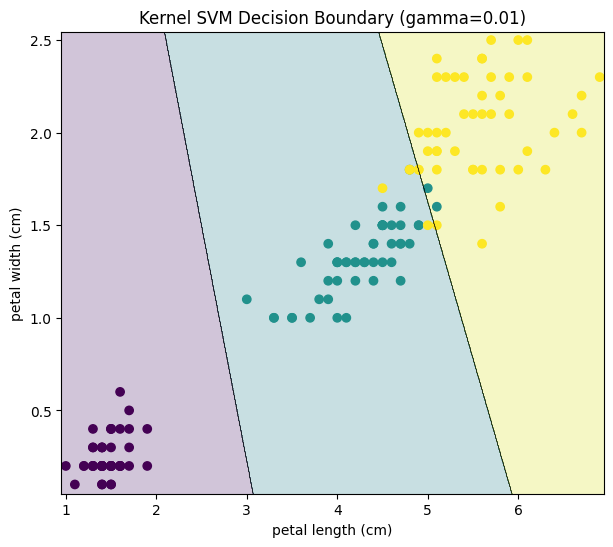

Training Kernel SVM with gamma=0.1


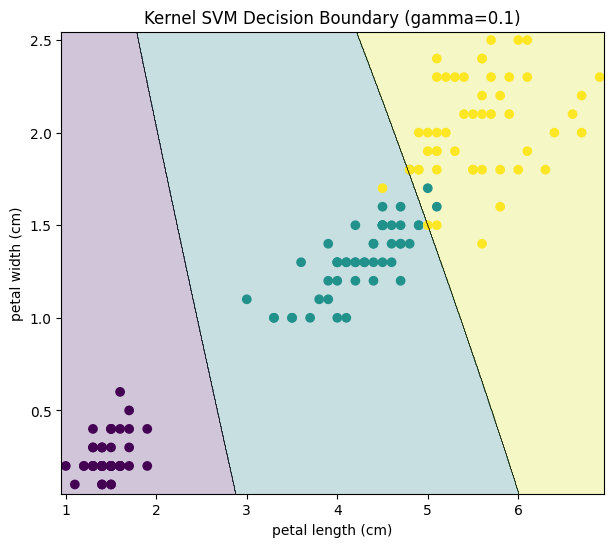

Training Kernel SVM with gamma=1.0


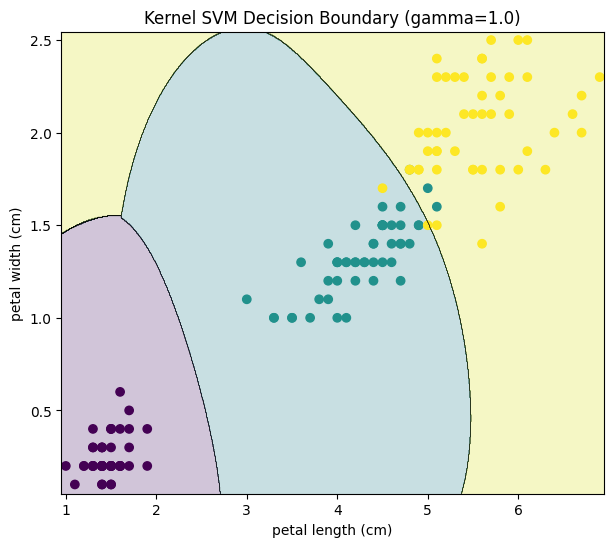

Training Kernel SVM with gamma=10.0


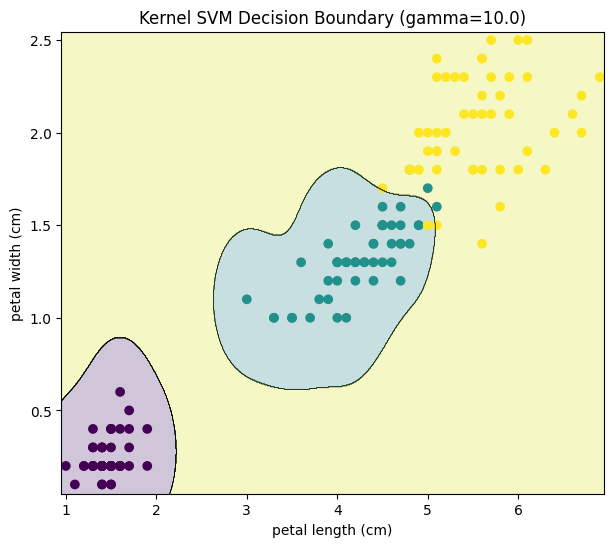

Training Kernel SVM with gamma=100.0


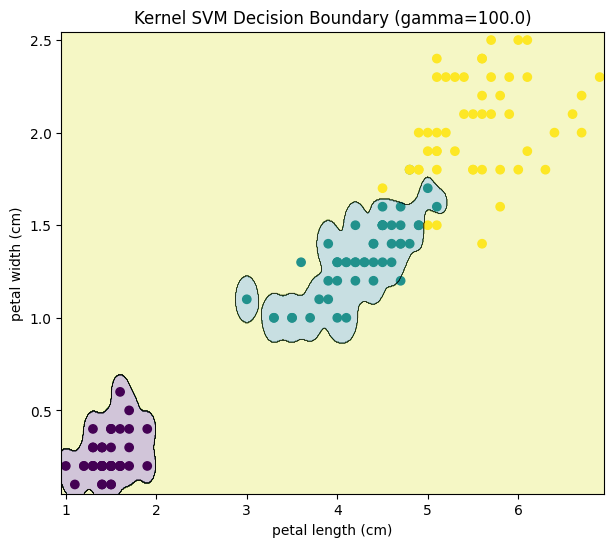

In [ ]:
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    print(f"Training Kernel SVM with gamma={gamma}")
    # Instantiate SVC with RBF kernel, C=1.0, specified gamma, and max_iter
    # Set random_state for reproducibility
    kernel_svm = SVC(kernel='rbf', C=1.0, gamma=gamma, max_iter=100000, random_state=42)

    # Fit the model to the training data
    kernel_svm.fit(X_train, y_train)

    # Plot the decision boundary
    plot_decision_boundary(kernel_svm, X, y)
    plt.title(f'Kernel SVM Decision Boundary (gamma={gamma})')
    plt.show()

Effect of gamma on the decision boundary (Kernel SVM with RBF kernel)

In an RBF (Gaussian) kernel SVM, the parameter gamma controls how far the influence of a single training example reaches. It directly affects the complexity and smoothness of the decision boundary.

Small gamma values (e.g., 0.01, 0.1)

Each training point has a wide influence.

The decision boundary is smooth and simple, changing gradually across the feature space.

The model focuses on the global structure of the data.

Higher bias, lower variance → may underfit if gamma is too small.

Medium gamma values (e.g., 1.0)

A balance between global and local influence.

The decision boundary becomes more flexible while still remaining relatively smooth.

Often a good trade-off for generalization.

Large gamma values (e.g., 10.0, 100.0)

Each training point has a very narrow, local influence.

The decision boundary becomes highly curved and complex, tightly wrapping around data points.

Lower bias, higher variance → increased risk of overfitting.



#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [ ]:
selected_gamma = 1.0

# Train Kernel SVM with the selected gamma value
kernel_svm_selected = SVC(kernel='rbf', C=1.0, gamma=selected_gamma, max_iter=100000, random_state=42)
kernel_svm_selected.fit(X_train, y_train)

# Calculate the accuracy on the test set
test_accuracy_kernel = kernel_svm_selected.score(X_test, y_test)
test_error_kernel = 1 - test_accuracy_kernel

# Get the number of support vectors per class
num_support_vectors = kernel_svm_selected.n_support_

print(f"Selected gamma value: {selected_gamma}")
print(f"Test Accuracy (Kernel SVM): {test_accuracy_kernel:.4f}")
print(f"Test Error (Kernel SVM): {test_error_kernel:.4f}")
print(f"Number of support vectors per class: {num_support_vectors}")
print(f"Total number of support vectors: {sum(num_support_vectors)}")

Selected gamma value: 1.0
Test Accuracy (Kernel SVM): 1.0000
Test Error (Kernel SVM): 0.0000
Number of support vectors per class: [ 3 12 15]
Total number of support vectors: 30


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

Based on the test accuracies and the visual representation of the decision boundaries from our previous exercises, I will now explain which SVM model is preferable for the Iris dataset.